In [ ]:
from ete3 import Tree
import Bio
import matplotlib.pyplot as plt

# 1. For .fast:

In [ ]:
from Bio import SeqIO

genfilename = "/data/sars-cov-2/2020_04_27/2020-05-11-gisaid_corrected_rus.fasta"

records_gen = SeqIO.parse(genfilename, "fasta")


record = next(records_gen)

print("len(record):")
print(len(record))

print("\nrecord.id:")
print(record.id)

print("\nrecord.name:")
print(record.name)

print("\nrecord.description:")
print(record.description)

# long string:
# print(record.seq)

print("\nSeqRecord:")
print(record)

# 2. For trees:

In [ ]:
file_tree = "/data/sars-cov-2/2020_04_27/sarscov2_20200427.fin.treefile.tre"

In [ ]:
from Bio import Phylo
tree = Phylo.read(file_tree, "nexus")

### 2.0. `Phylo.draw` failure (too long):

In [ ]:
# failure (too long) ():
# Phylo.draw?

### 2.1. `Phylo.draw  # (to file)` for small trees only:

In [2]:
# for small trees only:
# tree.ladderize()   # Flip branches so deeper clades are displayed at top
# Phylo.draw(tree, do_show=False)
### Phylo.draw(tree, axes=axes, label_func=get_label, do_show=False)

# plt.savefig("data_local/tmp.png")

### 2.2. `Phylo.draw_ascii` not very convenient (fast):

In [ ]:
# for small trees only:
# Phylo.draw_ascii(tree)

### 2.3. `Phylo.convert` + `ete3.Tree` "colors" and "labels" not understood. Need manual fixation

In [ ]:
file_tree_newick = "data_local/sars-cov-2_2020_04_27.txt"

In [ ]:
# failure (colors, labels not understood):
Phylo.convert(file_tree, "nexus", file_tree_newick, "newick")

In [ ]:
# fixing color, label:
with open(file_tree_newick, "r") as f:
    data = f.read()
out = data
out = out.replace(",!color=#ff0000", '')\
            .replace("[&!color=#0000ff]", '')\
            .replace(",!color=#0000ff",'')\
            .replace("[\[&!color=#ff0000\]]", '')\
            .replace("[\[&label=ete3_quotref_301\]]",'')
# out = data.replace("\\","")# .replace("''","'")# .replace("\'","'")#.replace("''","'")
# out = data.replace("''","'").replace("\\","").replace("''","")
#file_tree_newick_fixed = "data_local/sars-cov-2_2020_04_27_v1.txt"
#with open(file_tree_newick_fixed, "w") as f:
#    f.write(out)
# print(out)
# print("''" in out)

In [ ]:
# failure 
# tree = Tree(out,format=1,quoted_node_names=True)
# tree = Tree(file_tree_newick,format=1, quoted_node_names=True)

In [3]:
from genutils import * 

In [2]:
#1. filter out foreign sequences
genfilename = "/data/sars-cov-2/2020_04_27/2020-05-11-gisaid_corrected_rus.fasta"
allgenomes = readgenfile(genfilename)
rusgenomes = filtergenomes(allgenomes, 'Rus')
savegenfile("results/rus_sarscov2.fin.fas", rusgenomes)

lines read:  11994
sequences read:  5997
sequences saved: 150


In [4]:
#filter sbp and vreden sequences
genfilename = "/data/sars-cov-2/2020_04_27/2020-05-11-gisaid_corrected_rus.fasta"
allgenomes = readgenfile(genfilename)

spbgenomes = filtergenomes(allgenomes, 'StP')
savegenfile("results/spb_sarscov2.fin.fas", spbgenomes)

vredengenomes = filtergenomesbyfile(spbgenomes, "/data/sars-cov-2/2020_04_27/vreden_clade.txt")
savegenfile("results/vreden_sarscov2.fin.fas", vredengenomes)

lines read:  11994
sequences read:  5997
sequences saved: 84
sequences saved: 39


lines read:  300
sequences read:  150


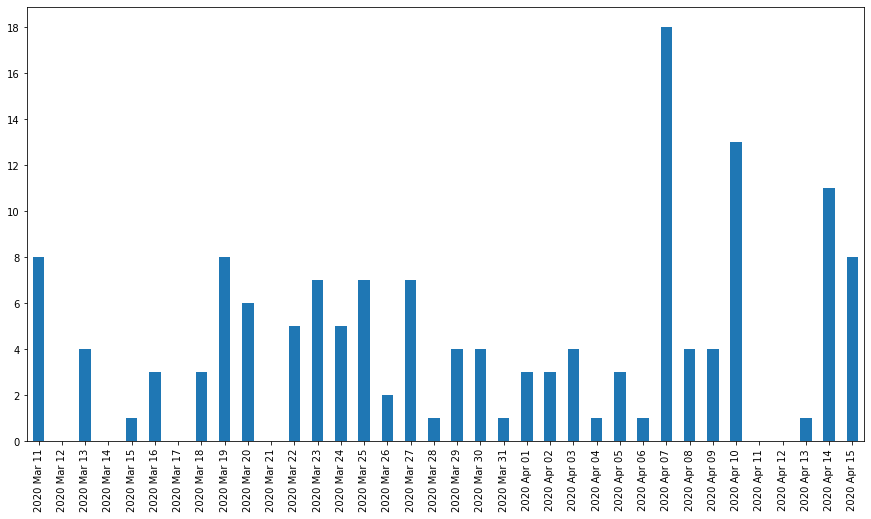

In [5]:
#optional - show distribution of sequence count by date
import pandas as pd  
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

rusgenomes = readgenfile("results/rus_sarscov2.fin.fas")
splitheader = [ {'location':genome["header"].split('|')[0], \
                 'code':genome["header"].split('|')[1], \
                 'date': genome["header"].split('|')[2]} \
               for genome in rusgenomes]

# Creates DataFrame.  
df = pd.DataFrame(splitheader)  
df["date"] = df["date"].astype("datetime64")  
existdatecounts = df["date"].value_counts()
datelist = pd.date_range(df['date'].min(), df['date'].max())

alldatecounts = [0]*datelist.size
for idx, date in enumerate(datelist):
    if date in existdatecounts:
        alldatecounts[idx] = existdatecounts[date]
        
ts = pd.Series(alldatecounts,  index=datelist)
ax = ts.plot(kind='bar', figsize=(15,8), yticks=range(0,max(alldatecounts)+1,2))
ticklabels = ['']*len(ts.index)
ticklabels[::1] = [item.strftime('%Y %b %d') for item in ts.index[::1]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
#plt.gcf().autofmt_xdate()
plt.show()

In [6]:
#optional - some statistics for aligned russian sequences
rusgenomes = readgenfile("results/rus_sarscov2.fin.fas")
mean,variance = getgensampleparams(rusgenomes)
print("Aligned samples from Russia: mean sequence length: {}, variance: {}".format(mean, variance))

sequences = [ genome["sequence"] for genome in rusgenomes]
fullline = ''.join(sequences)
bases = set(fullline)
total = len(fullline)
for character in bases:
    count = fullline.count(character)
    print (character, count, count/total)

lines read:  300
sequences read:  150
Aligned samples from Russia: mean sequence length: 29941.0, variance: 0.0
- 5715 0.0012725025884239003
C 822521 0.1831426249401601
N 6026 0.0013417498858866882
G 878556 0.19561938479008717
T 1438577 0.3203137281097269
A 1339755 0.29831000968571525


In [7]:
#optional - some statistics for unaligned chinese sequences 
chinagenomes = readgenfile("/data/sars-cov-2/all.fasta")
longchgen = filtergensize(chinagenomes, "greater", 29000)
print("filtered sequences (length>29000):", len(longchgen))

mean,variance = getgensampleparams(longchgen)
print("Samples from China: mean sequence length: {}, variance: {}".format(mean, variance))

sequences = [ genome["sequence"] for genome in longchgen]
fullline = ''.join(sequences)
bases = set(fullline)
total = len(fullline)
for character in bases:
    count = fullline.count(character)
    print (character, count, count/total)

lines read:  3794
sequences read:  1897
filtered sequences (length>29000): 1790
Samples from China: mean sequence length: 29813.97653631285, variance: 10694.696656159349
Y 128 2.398485146762369e-06
M 26 4.871922954361062e-07
W 53 9.931227560812936e-07
n 21 3.935014693907012e-07
C 9748710 0.18267293855542013
S 8 1.4990532167264807e-07
N 281095 0.005267204549446626
H 117 2.192365329462478e-06
G 10417844 0.19521128199443333
a 1 1.873816520908101e-08
K 33 6.183594518996734e-07
D 20 3.747633041816202e-07
V 18 3.3728697376345817e-07
T 17048295 0.31945376824314975
B 8 1.4990532167264807e-07
A 15870595 0.29738583107641503
t 1 1.873816520908101e-08
R 45 8.432174344086454e-07


In [3]:
#this cell requires ete3 
#fix tree file (remove color) and collect russian samples,
#then find close relatives to collected rus sample list from other countries
from ete3 import Tree
from nexus import NexusReader

treefile = "/data/sars-cov-2/2020_04_27/sarscov2_20200427.fin.treefile.tre"
fixedtreefile = "results/sarscov2_20200427.fin.treefile.tre.fix"

#1. removing color info which makes ete think there are additional nodes
# (all commas separate nodes, it supposes)
with open(treefile,'r') as f:
    treefiletext=f.read()
with open(fixedtreefile, 'w') as f:
    f.write(treefiletext.replace("[&!color=#ff0000]", '')\
            .replace(",!color=#ff0000", '')\
            .replace("[&!color=#0000ff]", '')\
            .replace(",!color=#0000ff",''))

#2. Collecting a list of leafs from Russia
n = NexusReader.from_file(fixedtreefile)
sarstree = n.trees.trees[0].newick_string
t = Tree(sarstree,  format=1)

russnodes = []
for node in t.traverse("levelorder"):
    if "Russ" in node.name:
        russnodes.append(node)
print ("sequences from Russia in the tree: ", len(russnodes))

#3. Collecting all sisters of leafs from Russia and their ancestors
sisterlist = []
for idx, node in enumerate(russnodes[:]):
    for sister in node.get_sisters():
        sisterlist.append(sister)
    for uppernode in node.iter_ancestors():        
        for sister in uppernode.get_sisters():
            sisterlist.append(sister)    
print("total sisterlist len = ", len(sisterlist))

#4. Collecting sisters' closest descendants
titles = []
for node in sisterlist:
    if node.is_leaf():
        titles.append(node.name)
    else:
        leaf, _ = node.get_closest_leaf()
        titles.append(leaf.name)
print("total titles len = ", len(titles))
       
uniqtitles = list(set(titles))
print("total unique titles len = ", len(uniqtitles))
foreign = [line[1:-1] for line in uniqtitles if not "Rus" in line]
print("total foreign titles len = ", len(foreign))

with open("results/closeforeignfilter.txt",'w') as f:
    f.write('\n'.join(foreign))

sequences from Russia in the tree:  150
total sisterlist len =  13327
total titles len =  13327
total unique titles len =  1041
total foreign titles len =  925


In [8]:
#select close foreign sequences from all sequences and save to separate fasta 
genfilename = "/data/sars-cov-2/2020_04_27/2020-05-11-gisaid_corrected_rus.fasta"
allgenomes = readgenfile(genfilename)
rusgenomes = readgenfile("results/rus_sarscov2.fin.fas")

closeforeigngenomes = filtergenomesbyfile(allgenomes, "results/closeforeignfilter.txt")
savegenfile("results/closeforeign.fin.fas", closeforeigngenomes)
savegenfile("results/rus_and_closeforeign.fin.fas", closeforeigngenomes+rusgenomes)

lines read:  11994
sequences read:  5997
lines read:  300
sequences read:  150
Not found!  Spain/Catalua201397/2020|EPI_ISL_419707
sequences saved: 924
sequences saved: 1074


In [10]:
#find dates from gisaid data
import re
import os.path
DATE_REGEX = re.compile("^20[0-9][0-9]-[0-9][0-9]-[0-9][0-9]$")
DATELINE_REGEX = re.compile("Collection date: (?P<date>20[0-9][0-9]-[0-9][0-9]-[0-9][0-9])$")

genfilename = "results/rus_and_closeforeign.fin.fas"
outgenfilename = "results/rus_and_closeforeign_wdates.fin.fas"
gisaidfolder = "/data/sars-cov-2/gisaid_text"
allgenomes = readgenfile(genfilename)

seqtoremove=[]

for genome in allgenomes:
    header = genome['header']
    headparts = header.split('|')
    if len(headparts) == 3:
        #check that the last is date
        match = DATE_REGEX.match(headparts[2])
        if not match:
            print('encountered 3rd field with wrong date format!')
    elif len(headparts) >3:
        #not sure what it could be
        print('encountered 4 or more fields in meta!')
    elif len(headparts) == 2:
        #add date
        epicode = headparts[1]
        fname = os.path.join(gisaidfolder, epicode+".txt")
        with open(fname, 'r') as f:
            for fline in f:
                match = DATELINE_REGEX.match(fline)
                if match:
                    break
            if match:
                datestr = match.groupdict()['date']
                genome['header'] = header + '|'+ datestr
            else:                
                print('wrong date line in gisaid file!', fname, fline)
                seqtoremove.append(header)
    else:
        print('encountered 0 or 1 fields in meta!')
        
goodgenomes = [genome for genome in allgenomes if not(genome['header'] in seqtoremove)]
        
savegenfile(outgenfilename, goodgenomes)

lines read:  2148
sequences read:  1074
wrong date line in gisaid file! /data/sars-cov-2/gisaid_text/EPI_ISL_419693.txt     
wrong date line in gisaid file! /data/sars-cov-2/gisaid_text/EPI_ISL_415523.txt     
wrong date line in gisaid file! /data/sars-cov-2/gisaid_text/EPI_ISL_420556.txt     
wrong date line in gisaid file! /data/sars-cov-2/gisaid_text/EPI_ISL_420546.txt     
wrong date line in gisaid file! /data/sars-cov-2/gisaid_text/EPI_ISL_416742.txt     
wrong date line in gisaid file! /data/sars-cov-2/gisaid_text/EPI_ISL_424542.txt     
wrong date line in gisaid file! /data/sars-cov-2/gisaid_text/EPI_ISL_424983.txt     
wrong date line in gisaid file! /data/sars-cov-2/gisaid_text/EPI_ISL_420305.txt     
sequences saved: 1066


In [12]:
#create simple localization
genfilename = "results/rus_and_closeforeign_wdates.fin.fas"
allgenomes = readgenfile(genfilename)

outtext=''
for genome in allgenomes:
    header = genome['header']
    if 'Russ' in header:
        loc = "RUS"
    else:
        loc = "WORLD"
    outtext += header + '\t' + loc+'\n' 
    
with open('results/rus_and_closeforeign_wdates.loc.txt','w') as f:
    f.write(outtext)


lines read:  2132
sequences read:  1066


In [3]:
from genutils import diffheaders
diffheaders("results/closeforeign.fin.fas", "results/rus_and_closeforeign.fin.fas" )

lines read:  1848
sequences read:  924
lines read:  2148
sequences read:  1074
hCoV-19/Russia/Moscow-77610/2020|EPI_ISL_428887|2020-03-22 from results/rus_and_closeforeign.fin.fas does not exist in results/closeforeign.fin.fas
hCoV-19/Russia/Omsk-89001/2020|EPI_ISL_428878|2020-04-01 from results/rus_and_closeforeign.fin.fas does not exist in results/closeforeign.fin.fas
hCoV-19/Russia/Primorskiy-79001/2020|EPI_ISL_428903|2020-03-22 from results/rus_and_closeforeign.fin.fas does not exist in results/closeforeign.fin.fas
hCoV-19/Russia/StPetersburg-RII5942S/2020|EPI_ISL_430099|2020-04-13 from results/rus_and_closeforeign.fin.fas does not exist in results/closeforeign.fin.fas
hCoV-19/Russia/StPetersburg-RII4696S/2020|EPI_ISL_427327|2020-04-07 from results/rus_and_closeforeign.fin.fas does not exist in results/closeforeign.fin.fas
hCoV-19/Russia/StPetersburg-RII6086S/2020|EPI_ISL_430111|2020-04-15 from results/rus_and_closeforeign.fin.fas does not exist in results/closeforeign.fin.fas
hCoV